<a href="https://colab.research.google.com/github/CrystalWang1225/ECE-471-Frequentist-Machine-Learning/blob/main/ML_6_Crystal_%26_YingZhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install squarify

# Market Basket Analysis - Lastfm dataset

The dataset is obtained from the website http://ocelma.net/MusicRecommendationDataset/lastfm-360K.html This dataset contains users, artists, plays and other user profile infos. In this preliminary section, we are only exploring the transcations of users and artists.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

columns = ['user_id', 'artist_id','artist']
df = pd.read_csv('test.csv', names=columns)
df.head()

artist_data = df[['user_id', 'artist']]

onehot = artist_data.pivot_table(index='user_id', columns= 'artist',aggfunc=len,fill_value=0)
onehot = onehot > 0

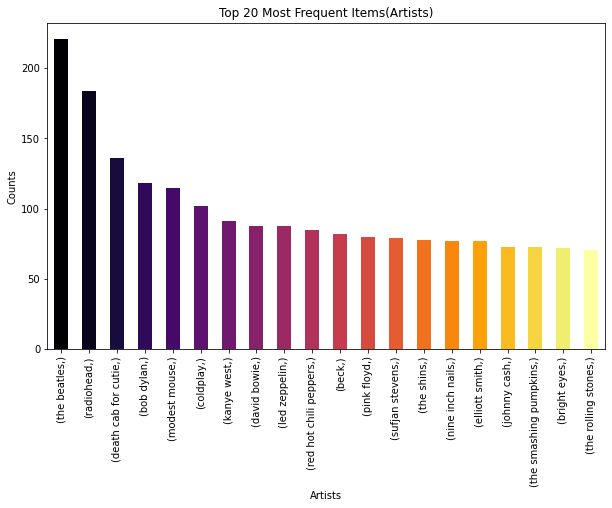

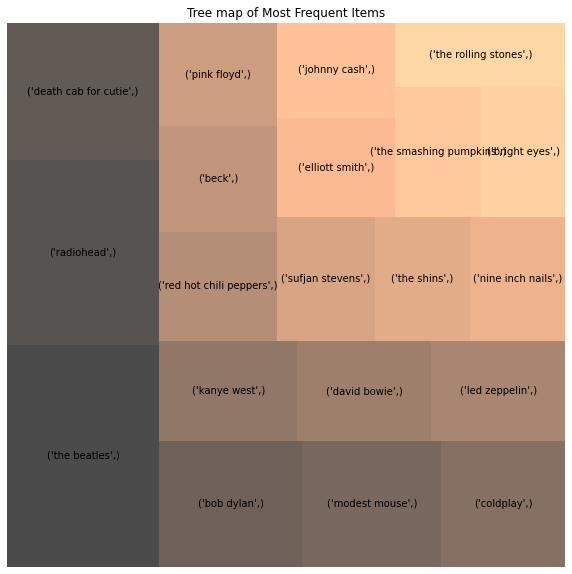

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,20))
df[['artist']].value_counts().head(20).plot.bar(color = color)
plt.title('Top 20 Most Frequent Items(Artists)')
plt.ylabel('Counts')
plt.xlabel('Artists')
plt.show()

import squarify
plt.rcParams['figure.figsize']=(10,10)
Items = df[['artist']].value_counts().head(20).to_frame()
size = Items[0].values
lab = Items.index
color = plt.cm.copper(np.linspace(0,1,20))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
plt.title('Tree map of Most Frequent Items')
plt.axis('off')
plt.show()

In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori

# compute frequent items using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.02, use_colnames=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.022849,(2pac),1
1,0.028683,(3 doors down),1
2,0.030141,(30 seconds to mars),1
3,0.025280,(50 cent),1
4,0.057851,([unknown]),1
...,...,...,...
718,0.031599,"(the beatles, pink floyd, radiohead)",3
719,0.020418,"(the beatles, pink floyd, the rolling stones)",3
720,0.020418,"(the beatles, the rolling stones, radiohead)",3
721,0.020904,"(the beatles, radiohead, the smashing pumpkins)",3


In [ ]:
# compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, metric="lift",min_threshold=1)
rules.head(20)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2pac),(kanye west),0.022849,0.073894,0.011667,0.510638,6.910414,0.009979,1.892477
1,(kanye west),(2pac),0.073894,0.022849,0.011667,0.157895,6.910414,0.009979,1.160367
2,(3 doors down),(linkin park),0.028683,0.108410,0.011667,0.406780,3.752223,0.008558,1.502965
3,(linkin park),(3 doors down),0.108410,0.028683,0.011667,0.107623,3.752223,0.008558,1.088461
4,(coldplay),(30 seconds to mars),0.183763,0.030141,0.011667,0.063492,2.106503,0.006129,1.035612
5,(30 seconds to mars),(coldplay),0.030141,0.183763,0.011667,0.387097,2.106503,0.006129,1.331755
6,(linkin park),(30 seconds to mars),0.108410,0.030141,0.013612,0.125561,4.165775,0.010344,1.109121
7,(30 seconds to mars),(linkin park),0.030141,0.108410,0.013612,0.451613,4.165775,0.010344,1.625840
8,(muse),(30 seconds to mars),0.126884,0.030141,0.012154,0.095785,3.177914,0.008329,1.072598
9,(30 seconds to mars),(muse),0.030141,0.126884,0.012154,0.403226,3.177914,0.008329,1.463060


As we can see from the results: nothing really surprising happening here: people who listen to rappers tend to listen to other rappers, while people who listen to rock bands will listen to more rock bands.

# Transaction with gender added

The result above is rather expected. In order to learn more about the dataset and people's preference, we decided to add gender specificly as a feature in the itemset to explore the relationship between genders and the artists they listen to. Therefore, market basket analysis is conducted twice, once with male as TRUE in the one hot matrix, and the other time with female marked as TRUE in the spare matrix. We first tried to run our script with the whole dataset, which has about 2,000,000 entries. This caused a memory crash. So we decided to constrain our dataset to the U.S. users, which have about 35,000 entries.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

columns = ['user_id','artist', 'gender']
df = pd.read_csv('user_song_and_profile_usa_processed.csv', names=columns)
df = df[df.gender.notnull()]

artist_data = df[['user_id', 'artist']]
gender_data = df[['user_id','gender']]
onehot = artist_data.pivot_table(index='user_id', columns= 'artist',aggfunc=len,fill_value=0)
onehot = onehot > 0
onehot_f = onehot.copy()

gender_data = gender_data.drop_duplicates()
female_data = gender_data.copy()

gender_data['gender'] = gender_data['gender'].replace('f', False)
gender_data['gender'] = gender_data['gender'].replace('m',True)
gender = gender_data['gender'].tolist()

female_data['gender'] = female_data['gender'].replace('f', True)
female_data['gender'] = female_data['gender'].replace('m',False)
gender_f = female_data['gender'].tolist()
onehot_f['gender'] = gender_f

onehot['gender'] = gender
onehot.shape

(682, 10142)

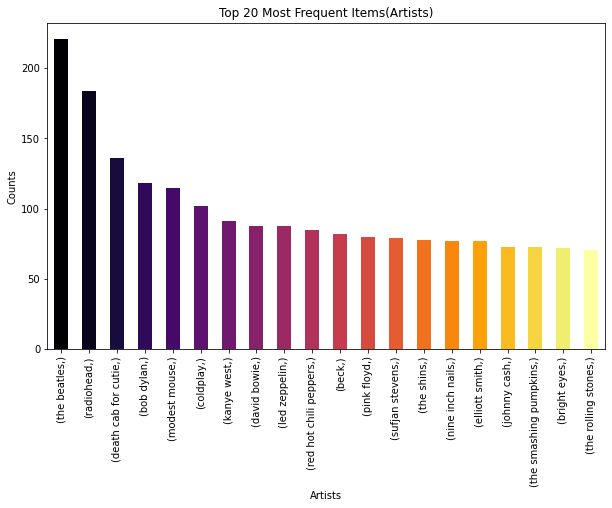

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,20))
df[['artist']].value_counts().head(20).plot.bar(color = color)
plt.title('Top 20 Most Frequent Items(Artists)')
plt.ylabel('Counts')
plt.xlabel('Artists')
plt.show()


As shown from the the bar graph above. Of all the 10142 artists exist in this dataset, these artists aboce are the ones that have the have the most frequent plays. In return, we are expecting to see the support of these names popping up in the analysis as their support will be the highest.

In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori

# compute frequent items using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.07, use_colnames=True)
frequent_itemsets_f = apriori(onehot_f, min_support = 0.04, use_colnames=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
rules_male = frequent_itemsets.copy().sort_values(by=['support'],ascending=False)
frequent_itemsets = frequent_itemsets[frequent_itemsets['length']!=1]


frequent_itemsets_f['length'] = frequent_itemsets_f['itemsets'].apply(lambda x: len(x))
rules_female = frequent_itemsets_f.copy().sort_values(by=['support'],ascending=False)
frequent_itemsets_f = frequent_itemsets_f[frequent_itemsets_f['length']!=1]

gender_list = []
gender_list_f = []
for i in range(len(frequent_itemsets)):
  row = frequent_itemsets.iloc[i,:]
  each_itemsets=list(row['itemsets'])
  if 'gender' in each_itemsets:
    gender_list.append(i)

for i in range(len(frequent_itemsets_f)):
  row = frequent_itemsets_f.iloc[i,:]
  each_itemsets=list(row['itemsets'])
  if 'gender' in each_itemsets:
    gender_list_f.append(i)

frequent_itemsets = frequent_itemsets.iloc[gender_list].sort_values(by=['support'],ascending=False)
frequent_itemsets_f = frequent_itemsets_f.iloc[gender_list_f].sort_values(by=['support'], ascending=False)
frequent_itemsets

,support,itemsets,length
101,0.222874,"(the beatles, gender)",2
97,0.195015,"(radiohead, gender)",2
72,0.130499,"(bob dylan, gender)",2
91,0.121701,"(modest mouse, gender)",2
83,0.120235,"(death cab for cutie, gender)",2
88,0.102639,"(led zeppelin, gender)",2
70,0.096774,"(beck, gender)",2
86,0.093842,"(kanye west, gender)",2
107,0.093842,"(radiohead, the beatles, gender)",3
95,0.092375,"(gender, pink floyd)",2


In [ ]:
frequent_itemsets_f

,support,itemsets,length
288,0.101173,"(the beatles, gender)",2
219,0.079179,"(death cab for cutie, gender)",2
268,0.074780,"(radiohead, gender)",2
206,0.058651,"(coldplay, gender)",2
199,0.046921,"(bright eyes, gender)",2
245,0.046921,"(modest mouse, gender)",2
224,0.045455,"(fall out boy, gender)",2
246,0.045455,"(muse, gender)",2
274,0.045455,"(sufjan stevens, gender)",2
209,0.043988,"(david bowie, gender)",2


The dataset has 491 male users and 191 female users. Comparing the frequent itemsets for male being TRUE and female being TRUE, we took out only the itemsets that contains gender here. Our dataset has more male users than female ones, so it makes sense for them to have an average higher support than that of females. 


As we can see clearly, the beatles is users' favorite regarless of gender. Starting from the second highest support here, we can already see the difference. The female uses tend to like artists such as muse and bright eyes way more than the fellow male users. Beck and Kanye West, for example, are loved amongst male users instead of female users. 

Some artists appear as users' favorite in both the male users' list and female users' list, but their support from the two genders varies. For example, in male users' list, Bob Dylan and Death Cab for Cutieranks have a close support, they rank the 3rd and the 5th. But in the female users' list, Death Cab for Cutie has a clear advantage of support over Bob Dylan. 

We are only seeing item set length 2 and 3 here (length 1 one has been taken out). If we decrease the value of min_support we will be able to get itemsets with longer itemset length.

In [ ]:
# Association rules
rules = association_rules(rules_male, metric="lift",min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(radiohead),(gender),0.269795,0.719941,0.195015,0.722826,1.004007,0.000778,1.010408
1,(gender),(radiohead),0.719941,0.269795,0.195015,0.270876,1.004007,0.000778,1.001483
2,(bob dylan),(gender),0.173021,0.719941,0.130499,0.754237,1.047637,0.005934,1.139549
3,(gender),(bob dylan),0.719941,0.173021,0.130499,0.181263,1.047637,0.005934,1.010067
4,(radiohead),(the beatles),0.269795,0.324047,0.123167,0.456522,1.408814,0.035741,1.243754
...,...,...,...,...,...,...,...,...,...
67,(coldplay),(radiohead),0.149560,0.269795,0.070381,0.470588,1.744246,0.030031,1.379277
68,(death cab for cutie),(coldplay),0.199413,0.149560,0.070381,0.352941,2.359862,0.040557,1.314316
69,(coldplay),(death cab for cutie),0.149560,0.199413,0.070381,0.470588,2.359862,0.040557,1.512219
70,(modest mouse),(death cab for cutie),0.168622,0.199413,0.070381,0.417391,2.093095,0.036756,1.374141


In [ ]:
rules_f = association_rules(rules_female, metric="lift",min_threshold=1)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(radiohead),(gender),0.269795,0.719941,0.195015,0.722826,1.004007,0.000778,1.010408
1,(gender),(radiohead),0.719941,0.269795,0.195015,0.270876,1.004007,0.000778,1.001483
2,(bob dylan),(gender),0.173021,0.719941,0.130499,0.754237,1.047637,0.005934,1.139549
3,(gender),(bob dylan),0.719941,0.173021,0.130499,0.181263,1.047637,0.005934,1.010067
4,(radiohead),(the beatles),0.269795,0.324047,0.123167,0.456522,1.408814,0.035741,1.243754
5,(the beatles),(radiohead),0.324047,0.269795,0.123167,0.380090,1.408814,0.035741,1.177922
6,(modest mouse),(gender),0.168622,0.719941,0.121701,0.721739,1.002497,0.000303,1.006461
7,(gender),(modest mouse),0.719941,0.168622,0.121701,0.169043,1.002497,0.000303,1.000507
8,(bob dylan),(the beatles),0.173021,0.324047,0.115836,0.669492,2.066033,0.059769,2.045191
9,(the beatles),(bob dylan),0.324047,0.173021,0.115836,0.357466,2.066033,0.059769,1.287060


#Conclusion: 
From the association rules above, we found that male and female users do have different preference on some artists. We are able to provide some strategies for music streaming services to have accurate recommendations of artists to different gender of people. 
*   Artists like the beatles, radiohead, and death cab for cutie can be recommended to everyone regardless of gender.
*   Kanye West, for example, should be a recommend for male users instead of the female uses.
*   Muse and Bright Eyes are more popular among the female users.

The association rule that discovers associations between different artists and between different genders can help the music streaming service develop recommending strategies by gaining insight into which artists are frequently listend together by users.